In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
log_interval = 100

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True, transform=torchvision.transforms.ToTensor()),
  batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True, transform=torchvision.transforms.ToTensor()), 
  batch_size=batch_size_test, shuffle=True)

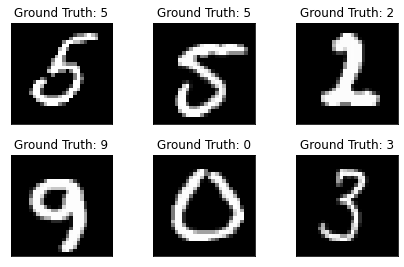

In [4]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
fig = plt.figure()
image_dimensions = example_data[0][0].size()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()


In [5]:
input_dimension = image_dimensions[0]*image_dimensions[0]
ouput_dimension = 10

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(nn.Flatten(), nn.Linear(input_dimension, ouput_dimension), nn.ReLU())
    def forward(self, x):
        return self.net(x)

In [7]:
net = Net()
net.cuda()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [8]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [9]:
def train(epoch):
    net.train()
    for batch_idx, (x, y) in enumerate(train_loader):
        x = x.cuda()
        y = y.cuda()
        optimizer.zero_grad()
        y_hat = net(x)
        l = loss(y_hat, y)
        l.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(x), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), l.item()))
            train_losses.append(l.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [10]:
def test():
  net.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for x, y in test_loader:
      x = x.cuda()
      y = y.cuda()
      y_hat = net(x)
      test_loss +=  loss(y_hat, y).item()
      pred = y_hat.data.max(1, keepdim=True)[1]
      correct += pred.eq(y.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [11]:
for epoch in range(0, n_epochs):
  train(epoch)
  test()

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.300922
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.833655
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.556997
Train Epoch: 0 [19200/60000 (32%)]	Loss: 1.161903
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.975021
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.875861
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.874358
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.711796
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.616409
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.667531

Test set: Avg. loss: 0.0006, Accuracy: 8654/10000 (87%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.605955
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.525613
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.634156
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.688638
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.534044
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.554924
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.561989
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.467711
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.481520
Trai

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(nn.Flatten(), nn.Linear(input_dimension, input_dimension), nn.ReLU(), nn.Linear(input_dimension, ouput_dimension), nn.ReLU())
    def forward(self, x):
        return self.net(x)

In [13]:
net = Net()
net.cuda()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
for epoch in range(0, 5):
  train(epoch)
  test()

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.320492
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.105382
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.806932
Train Epoch: 0 [19200/60000 (32%)]	Loss: 1.651806
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.260128
Train Epoch: 0 [32000/60000 (53%)]	Loss: 1.376977
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.878462
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.894314
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.965802
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.776486

Test set: Avg. loss: 0.0008, Accuracy: 7988/10000 (80%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.777596
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.872577
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.717816
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.894503
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.708742
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.609661
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.710964
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.762873
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.583953
Trai